In [1]:
import tensorflow as tf
import wandb
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go

2023-11-20 20:48:43.361213: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-20 20:48:43.467252: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-20 20:48:44.491571: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-11-20 20:48:44.491628: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

In [2]:
# os.environ["CUDA_VISIBLE_DEVICES"] = "1"
# physical_devices = tf.config.list_physical_devices("GPU")
# tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [3]:
project_name = "transforming-prosit-full-dataset"
run = wandb.init(project=project_name)

wandb: Currently logged in as: mamisashvili-lizi (prosit-compms). Use `wandb login --relogin` to force relogin


In [4]:
def concat_history(artifact_paths):
    loss = []
    val_loss = []
    for artifact_path in artifact_paths:
        history = run.use_artifact(artifact_path)
        history_dir = history.download()
        history_df = pd.read_parquet(history_dir + "/0000.parquet")
        loss.extend(history_df["loss"].tolist())
        val_loss.extend(history_df["val_loss"].tolist())
    return loss, val_loss

def plot_loss_curve(x_values, y_values):
    sns.set(style="whitegrid")
    ax = sns.lineplot(x=x_values, y=y_values)
    new_y_ticks = np.arange(min(y_values), max(y_values)+0.05, 0.05)
    ax.set_yticks(new_y_ticks)
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set(xlabel='Epoch', ylabel='Spectral Distance')
    
def compare_loss_curves(x_values, y_values_dict):
    sns.set(style="whitegrid")
    for label, y_values in y_values_dict.items():
        ax = sns.lineplot(x=x_values, y=y_values, label=label)
    new_y_ticks = np.arange(min(y_values), max(y_values)+0.05, 0.05)
    ax.set_yticks(new_y_ticks)
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend()
    ax.set(xlabel='Epoch', ylabel='Spectral Distance')

In [5]:
artifact_paths = [
    "prosit-compms/transforming-prosit-full-dataset/run-6q5lsa8q-history:v0",
    "prosit-compms/transforming-prosit-full-dataset/run-sos0r8v9-history:v0",
    "prosit-compms/transforming-prosit-full-dataset/run-jagiqmx1-history:v0"
]

In [6]:
loss, val_loss = concat_history(artifact_paths)

wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  


In [7]:
x_values = np.arange(len(loss))

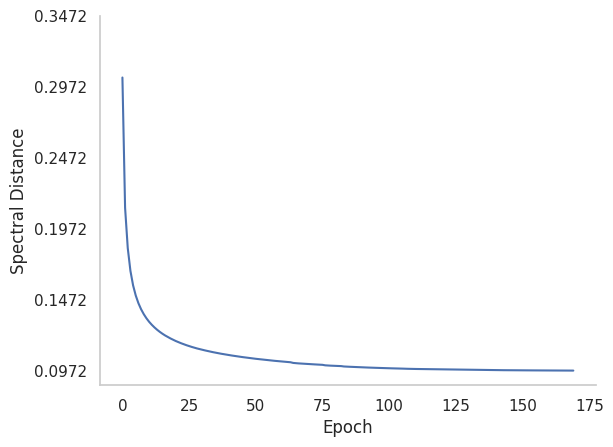

In [8]:
plot_loss_curve(x_values, loss)

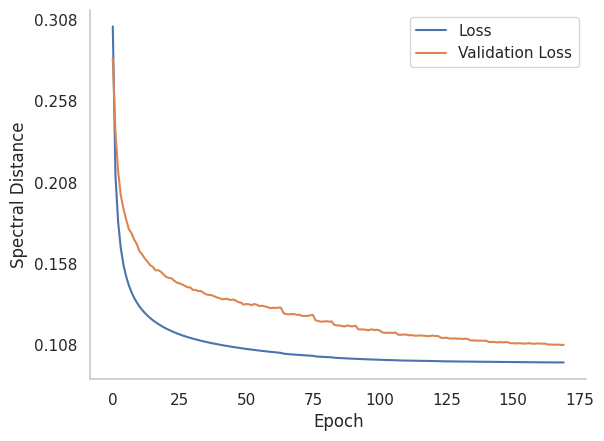

In [9]:
compare_loss_curves(x_values, {"Loss": loss, "Validation Loss": val_loss})